# Hierarchical Clustering - UPGMA

---

## Before Class
This weeks class we will be implementing UPGMA for hierarchical clustering. I have provided the code from Monday's class.

Prior to class, please do the following:
1. Review the UPGMA algorithm
2. Familiarize yourself with numpy array operations: delete, append, concatenate

---
## Learning Objectives

1. Implement UPGMA
* Understanding of hierarchical clustering
* manipulation of arrays and lists in python


---
## Background
Today we will implement a frequently used hierarchical clustering algorithm from Sokal and Michener (1958) called UPGMA - unweighted pair group method using arithmetic averages. We have previously implemented a distance matrix calculation, and so we will use those functions to implement the UPGMA algorithm below. The ultimate goal of this algorithm will be hierarchical clustering of sequence data using hamming distances. This step is often performed before multiple sequence alignment to avoid the order inconsistencies as shown in the slides for the class. The ultimate output of the algorithm will be a tree of our initial pair-wise alignments:

<img src="figures/final_tree.png">


---
## Imports

In [19]:
import numpy as np

---
## Distance metrics for comparing sequences

### Hamming Distance



In [20]:
def hamming_distance(alignment1, alignment2): 
    ''' Function to calculate Hamming distance between two alignments
    
    Args: 
        alignment1 (str): first sequence that has already been aligned
        alignment2 (str): second sequence that has already been aligned

    Returns:
        distance (int): hamming distance between the two alignment
    
    '''
    
    # Make sure that alingments are the same length
    assert len(alignment1) == len(alignment2)
    
    # Initialize distance
    distance = 0
    
    # Compare all locations alignments and add to distance if they are different
    for base_1, base_2 in zip(alignment1, alignment2):
        if base_1 != base_2:
            distance += 1
            
    return distance

In [21]:
def build_distance_matrix(alignments): 
    ''' Function to build a distance matrix from a list of alignments
    This is a number of alignments x number of alignments matrix with 
    all pairwise distances (and 0 along the diagonal).
    All alignments must be same length!
    
    Args: 
        alignments (list of strings): a list of our sequence alignments

    Returns:
        distance_matrix (np.array of floats): n x n distance matrix
    
    '''
    
    # Make sure that all alignments are the same length
    for i in range(1, len(alignments)):
        if len(alignments[0]) != len(alignments[i]):
            raise ValueError("Undefined for alignments of unequal length")
       
    #Initialize an empty matrix of floats
    distance_matrix = np.zeros((len(alignments),len(alignments)), dtype=float)
    
    #Compare all of the alignments and store their distances
    for i, alignment1 in enumerate(alignments):
        for j, alignment2 in enumerate(alignments):
            distance_matrix[i][j] = hamming_distance(alignment1, alignment2)
            
    return distance_matrix

---
## The UPGMA Algorithm

In UPGMA, we build a tree by iteratively merging the most similar alignment clusters in our distance matrix $d$ and then updating this matrix. This starts by defining clusters as $C$ for each individual alignment as the leaf nodes and $|C|$ as the number of items in a cluster (initially this is 1).

These distances are then updated using proportional averaging when merging clusters, so newly merged cluster $(C_{a} \cup C_{b})$ and existing cluster $C_{x}$ have distances updated as:

$d_{(C_{a} \cup C_{b}),C_{x}} = \frac{|C_{a}| \cdot d_{C_{a},C_{x}} + |C_{b}| \cdot d_{C_{b},C_{x}}}{|C_{a}| + |C_{b}|}$ where $d_{C_{a},C_{x}}$ refers to your distance matrix.

We can also estimate branch length in a similar manner such that branch length (or height) is half the distance of the members in the cluster minus any previous branches within that cluster.

```
UPGMA(distance_matrix)
    Initialization:
        Assign each sequence i to its own cluster C
        Define one leaf of T for each sequence and place its height as 0
    Iteration:
        Determine the two clusters i, j for which d(i,j) is min
        Define new cluster k distances for merged i,j given the above equation
        Define height of cluster k as d(i,j)/2
        Add k to current matrix and remove i and j
    Termination:
        When only two clusters i, j remain, place root at height d(i,j)/2
```

While the algorithm is conceptually straight-forward, there may be some difficulty in conceptualizing the data structures required. In addition to the numpy array manipulations described above, consider the storage of the tree that you will be creating. Python does not have a native tree data structure so you will have to either create one using your own class or through creative use of dictionaries or lists. For my implentation, I used nested lists.

In your implementation, focus on getting the clusters first and only worry about tracking the heights once you have clusters working correctly.

In [7]:
def get_min_distance(matrix):
    ''' Function to find the smallest value off-daigonal in the distance
    matrix provided. This is used in the UPGMA algorithm.
    
    Args: 
        matrix (2D numpy array): a distance matrix

    Returns:
        min (float): The smallest distance in the matrix
        pos (tuple): The x and y position of the smallest distance
    
    '''
    
    # Set the starting minimum value to be large
    minimum = float('inf')

    # Iterate through half the matrix to find the minimum score
    # We could do the whole matrix, but this is a bit more efficient
    # because the matrix is symmetric
    for i in range(0, matrix.shape[0]):
        for j in range(i+1, matrix.shape[1]):
            if matrix[i][j] < minimum:
                minimum = matrix[i][j]
                position = (i,j)

    return minimum, position

def UPGMA(matrix, alignments):
    ''' UPGMA algorithm to cluster alignments given a distance matrix
    
    Args: 
        matrix (2D numpy array): a distance matrix
        alignments (list of strings): a list of our sequence alignments

    Returns:
        clusters (list of lists): lists nested at each cluster level
        heights (dict): the heights of each cluster
    
    '''
    #initialization:
    #alignments are a list of sequences. 
    #Assign each sequence i to its own cluster C
    #want a list of lists. 
    clusters = [[index] for index in alignments]
    #output: [['TA-TTTA'], ['TA-TTAA'], ['TA-TTTA'], ['TACTT-A'], ['TACTTAA']]
    heights = {}

    
    
    
    # Initialization:
    #     
    #     Define one leaf of T for each sequence and place its height as 0
   



  # Iteration:
    #     Determine the two clusters i, j for which d(i,j) is min
    #     Define new cluster k distances for merged i,j given the above equation
    #     Define height of cluster k as d(i,j)/2
    #     Add k to current matrix and remove i and j
    # Termination:
    #     When only two clusters i, j remain, place root at height d(i,j)/2
    
    
    
    
#     clusters = [[i] for i in alignments]
#     heights = {}
    
#     while len(clusters) > 1:
#         # Get minimum distance between any two clusters
#         min_dist, position = get_min_distance(matrix)

#         # Define new cluster distances for first row
#         new_row = np.zeros((1,0), dtype=float)
#         for i in range(matrix.shape[0]):
#             if i not in position:
#                 A_dist = matrix[position[0]][i]
#                 B_dist = matrix[position[1]][i]
#                 A_size = len(clusters[position[0]])
#                 B_size = len(clusters[position[1]])
#                 new_row = np.append(new_row, round(((A_dist * A_size) + (B_dist * B_size))/(A_size + B_size), 2))       
        
        
#         # Keep track of heights
#         height = min_dist/2
#         heights[" ".join(str(x) for x in clusters[position[0]])] = height
#         heights[" ".join(str(x) for x in clusters[position[1]])] = height
        
#         # Create a new cluster and put at the 0th position
#         new_cluster = [clusters[position[0]], clusters[position[1]]]
#         del clusters[position[0]]
#         del clusters[position[1]-1]
#         clusters.insert(0, new_cluster)
        
#         # Add an empty cluster to account for the eventual final cluster
#         heights[" ".join(str(x) for x in new_cluster)] = 0

#         # Remove old rows and add a new one
#         matrix = np.delete(matrix, (position), axis = 0)
#         matrix = np.delete(matrix, (position), axis = 1)
#         matrix = np.vstack([new_row, matrix]) 
#         new_row = np.append([0], new_row)
#         matrix = np.concatenate((new_row[:, np.newaxis], matrix), axis=1)
    
    
    
    

In [11]:
alignments = ["TA-TTTA", "TA-TTAA", "TA-TTTA", "TACTT-A", "TACTTAA"]

In [ ]:
#make a list of lists. 

In [12]:
[[index] for index in alignments]

[['TA-TTTA'], ['TA-TTAA'], ['TA-TTTA'], ['TACTT-A'], ['TACTTAA']]

In [10]:
# This will test your functions
# alignments here are the same as from your slides on this topic
alignments = ["TA-TTTA", "TA-TTAA", "TA-TTTA", "TACTT-A", "TACTTAA"]

# This should be the same as the previous class:
D = build_distance_matrix(alignments)
print(D)
# New generate the clusters and heights using UPGMA
# clusters, heights = UPGMA(D, alignments)
# print (clusters)


[[0. 1. 0. 2. 2.]
 [1. 0. 1. 2. 1.]
 [0. 1. 0. 2. 2.]
 [2. 2. 2. 0. 1.]
 [2. 1. 2. 1. 0.]]


## Plotting our trees

We can plot the tree that we've build using ete3: ```$ conda install ete3```

This package takes as input Newick format for trees, which for our tree looks like this:
```(('TACTT-A':0.5, 'TACTTAA':0.5):1, (('TA-TTTA':0, 'TA-TTTA':0):0.5, 'TA-TTAA':0.5):1);```

This can also be implemented without heights like this:
```(('TACTT-A', 'TACTTAA'), (('TA-TTTA', 'TA-TTTA'), 'TA-TTAA'));```

Below, implement a function to convert your tree output above into a newick tree:

In [36]:
import ete3

def nested_list_to_newick(clusters, heights = None):
    ''' Function to convert nested lists to newick tree
    
    Args: 
        clusters (list of lists): Nested lists representing your cluster
        heights (dict): dictionart of cluster names with their heights

    Returns:
        newick_tree (str): newick tree representation of clusters
    
    '''
    pass

In [43]:
# This will test the above function

alignments = ["TA-TTTA", "TA-TTAA", "TA-TTTA", "TACTT-A", "TACTTAA"]

D = build_distance_matrix(alignments)
clusters, heights = UPGMA(D, alignments)

print(nested_list_to_newick(clusters))
print(nested_list_to_newick(clusters, heights))

((TACTT-A,TACTTAA),((TA-TTTA,TA-TTTA),TA-TTAA))
((TACTT-A:0.5,TACTTAA:0.5):0.92,((TA-TTTA:0.0,TA-TTTA:0.0):0.5,TA-TTAA:0.5):0.92):0


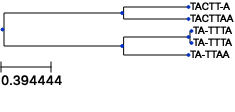

In [42]:
# Now we can plot the newick trees using ete3
# The plot below should be the same as in the introduction to the algorithm
ete3.Tree(nested_list_to_newick(clusters, heights) + ';', format=1 ).render("%%inline", tree_style=ete3.TreeStyle())